In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("height-weight.csv")
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


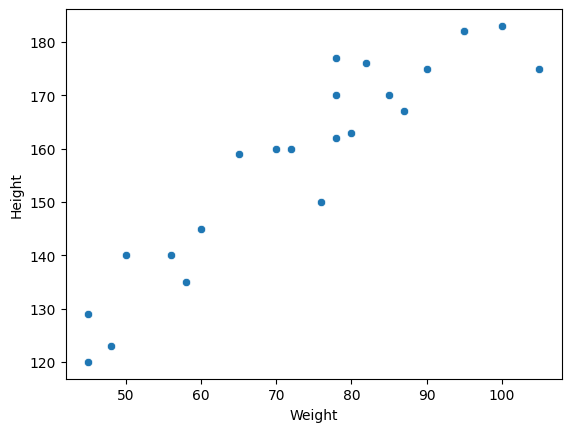

In [3]:
sns.scatterplot(x=df["Weight"], y=df["Height"])
plt.show()


<Axes: >

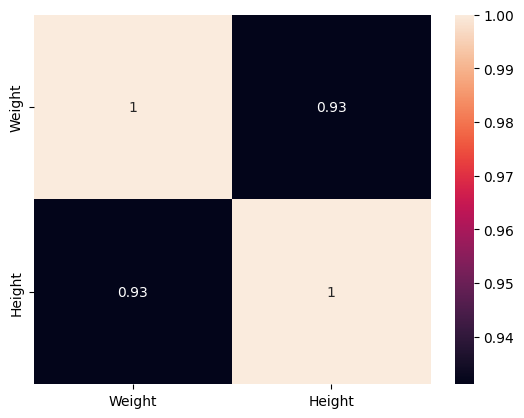

In [4]:
## Correlation
sns.heatmap(df.corr(), annot=True)



In [5]:
x = df[["Weight"]] # Df or 2d
y = df["Height"] # Series or 1d


In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print("X Train :",x_train.shape) 
print("X Test :",x_test.shape) 
print("Y Train :",y_train.shape) 
print("Y Test :",y_test.shape) 

X Train : (17, 1)
X Test : (6, 1)
Y Train : (17,)
Y Test : (6,)


In [7]:
# Stanardization
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
x_train = std.fit_transform(x_train)

x_test = std.transform(x_test)


In [8]:
# Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print("Coefficient :",model.coef_)
print("Intercept :",model.intercept_)

Coefficient : [17.2982057]
Intercept : 156.47058823529412


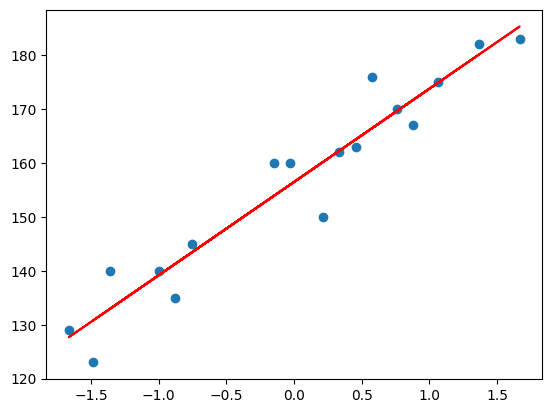

In [ ]:
# Best Fit Line
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')
plt.show()

In [30]:
# Prediction

y_pred = model.predict(x_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [38]:
# Performace metrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - x_test.shape[1] - 1)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"Adjusted R2 Score: {adj_r2}")

MSE: 114.84069295228699
MAE: 9.66512588679501
RMSE: 10.716374991212605
R2 Score: 0.7360826717981276
Adjusted R2 Score: 0.6701033397476595
